Подключение необходимых библиотек

In [2]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pathlib import Path

---

# Запросы к API

Загрузка данных из переменных окружения

In [6]:
load_dotenv()

DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')

Запрос данных по визитам по API

In [10]:
visits = requests.get(f'{API_URL}/visits', params={'begin': DATE_BEGIN, 'end': DATE_END})

Создание датафрейма по загруженным данным по визитам

In [13]:
visits_data = pd.DataFrame(visits.json())

Просмотр среза данных по визитам

In [16]:
visits_data.head()

visit_id platform  \
0  1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1  f149f542-e935-4870-9734-6b4501eaf614      web   
2  08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
3  19322fed-157c-49c6-b16e-2d5cabeb9592      web   
4  04762a22-3c9f-40c9-9ac9-6628c4381836      web   

                                          user_agent             datetime  
0  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T10:36:22  
1  Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...  2023-03-01T06:25:00  
2  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...  2023-03-01T10:26:13  
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-03-01T12:33:06  
4  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T01:38:35

Изучение данных по визитам

In [19]:
visits_data.describe()

visit_id platform  \
count                                 263459   263459   
unique                                146085        4   
top     64167edd-323a-4ab0-be9b-acd237a1ac30      web   
freq                                       4   236301   

                                               user_agent             datetime  
count                                              263459               263459  
unique                                                 32               261204  
top     Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-07-06T10:45:50  
freq                                                13623                    3

Запрос данных по регистрациям по API

In [22]:
regs = requests.get(f'{API_URL}/registrations', params={'begin': DATE_BEGIN, 'end': DATE_END})

Создание датафрейма по загруженным данным по регистрациям

In [25]:
regs_data = pd.DataFrame(regs.json())

Просмотр среза данных по регистрациям

In [28]:
regs_data.head()

datetime                               user_id  \
0  2023-03-01T07:40:13  2e0f6bb8-b029-4f45-a786-2b53990d37f1   
1  2023-03-01T13:14:00  f007f97c-9d8b-48b5-af08-119bb8f6d9b6   
2  2023-03-01T03:05:50  24ff46ae-32b3-4a74-8f27-7cf0b8f32f15   
3  2023-03-01T00:04:47  3e9914e1-5d73-4c23-b25d-b59a3aeb2b60   
4  2023-03-01T18:31:52  27f875fc-f8ce-4aeb-8722-0ecb283d0760   

                        email platform registration_type  
0           ebyrd@example.org      web            google  
1    knightgerald@example.org      web             email  
2  cherylthompson@example.com      web             apple  
3       halldavid@example.org      web             email  
4        denise86@example.net      web            google

Изучение данных по регистрациям

In [31]:
regs_data.describe()

datetime                               user_id  \
count                 21836                                 21836   
unique                21821                                 21836   
top     2023-06-23T13:10:45  2e0f6bb8-b029-4f45-a786-2b53990d37f1   
freq                      2                                     1   

                     email platform registration_type  
count                21836    21836             21836  
unique               20868        3                 4  
top     ujones@example.com  android             email  
freq                     6    10582              8996

---

# Расчет метрик

### Подготовка данных по визитам

Преобразование поля "datetime" в формат даты и времени

In [37]:
visits_data['datetime'] = pd.to_datetime(visits_data['datetime'])

Добавление поля "date_group" в формате даты

In [40]:
visits_data['date_group'] = visits_data['datetime'].dt.date

Очистка данных от ботов

In [43]:
visits_data = visits_data[~visits_data['user_agent'].str.contains('bot', case=False)]

Сортировка данных по дате

In [46]:
visits_data = visits_data.sort_values(by='datetime')

Отбор последних визитов

In [49]:
visits_data = visits_data.drop_duplicates(subset='visit_id', keep='last')

Группировка данных визитов по датам и платформам

In [52]:
group_visits_data = visits_data.groupby(['date_group', 'platform']).agg('count')

Просмотр получившихся данных по визитам

In [55]:
visits_data.head()

visit_id platform  \
272  348148db-9841-4b42-a0e1-7631f4667f83      web   
81   65f98235-9667-460c-964e-5604b75b48a1      web   
55   31d17176-658a-425d-99ee-50c433af81d9      web   
192  52bc1d7e-6c8a-474b-82a6-73a4adfd4423      web   
120  3ac77737-906e-46f2-9cd0-a52354c2676f      web   

                                            user_agent            datetime  \
272  Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple... 2023-03-01 00:03:08   
81   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl... 2023-03-01 00:03:57   
55   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl... 2023-03-01 00:11:30   
192  Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple... 2023-03-01 00:26:05   
120  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl... 2023-03-01 00:30:52   

     date_group  
272  2023-03-01  
81   2023-03-01  
55   2023-03-01  
192  2023-03-01  
120  2023-03-01

In [57]:
group_visits_data.head()

visit_id  user_agent  datetime
date_group platform                                
2023-03-01 android         75          75        75
           ios             22          22        22
           web            279         279       279
2023-03-02 android         67          67        67
           ios             31          31        31

### Подготовка данных по регистрациям

Преобразование поля "datetime" в формат даты и времени

In [62]:
regs_data['datetime'] = pd.to_datetime(regs_data['datetime'])

Добавление поля "date_group" в формате даты

In [65]:
regs_data['date_group'] = regs_data['datetime'].dt.date

Сортировка данных по дате

In [68]:
regs_data = regs_data.sort_values(by='datetime')

Группировка данных регистраций по датам и платформам

In [71]:
group_regs_data = regs_data.groupby(['date_group', 'platform']).agg('count')

Просмотр получившихся данных по регистрациям

In [74]:
regs_data.head()

datetime                               user_id  \
3  2023-03-01 00:04:47  3e9914e1-5d73-4c23-b25d-b59a3aeb2b60   
28 2023-03-01 00:23:00  b7ec78b7-fdf6-443c-bba6-01e719c26efe   
22 2023-03-01 00:55:55  2aeb1afe-7641-416f-a21b-d747dbe8d754   
20 2023-03-01 01:02:01  7188b134-a628-4138-9d46-545fb99a91a7   
55 2023-03-01 01:04:22  93ae2189-9f3c-47ea-ba0a-b06db9fb43ae   

                      email platform registration_type  date_group  
3     halldavid@example.org      web             email  2023-03-01  
28  smithrachel@example.net  android            google  2023-03-01  
22     kendra89@example.com  android            google  2023-03-01  
20   ghernandez@example.net  android             email  2023-03-01  
55       lisa22@example.net  android            google  2023-03-01

In [76]:
group_regs_data.head()

datetime  user_id  email  registration_type
date_group platform                                             
2023-03-01 android         61       61     61                 61
           ios             18       18     18                 18
           web              8        8      8                  8
2023-03-02 android         59       59     59                 59
           ios             24       24     24                 24

### Расчёт конверсии

Объединение датафреймов

In [81]:
conversion_data = pd.concat([group_visits_data['visit_id'], group_regs_data['user_id']], axis=1).reset_index()

Добавление колонки с конверсией

In [84]:
conversion_data['conversion'] = conversion_data['user_id'].astype(float) * 100 / conversion_data['visit_id'].astype(float)

Переименование колонок

In [87]:
conversion_data.rename(columns={'visit_id': 'visits', 'user_id': 'registrations'}, inplace=True)

Просмотр получившихся данных по конверсиям

In [90]:
conversion_data.head()

date_group platform  visits  registrations  conversion
0  2023-03-01  android      75             61   81.333333
1  2023-03-01      ios      22             18   81.818182
2  2023-03-01      web     279              8    2.867384
3  2023-03-02  android      67             59   88.059701
4  2023-03-02      ios      31             24   77.419355

Сохранение датафрейма

In [93]:
conversion_data.to_json('./conversion.json')

In [95]:
print(pd.read_json('./conversion.json'))

        date_group platform  visits  registrations  conversion
0    1677628800000  android      75             61   81.333333
1    1677628800000      ios      22             18   81.818182
2    1677628800000      web     279              8    2.867384
3    1677715200000  android      67             59   88.059701
4    1677715200000      ios      31             24   77.419355
..             ...      ...     ...            ...         ...
547  1693353600000      ios      66             40   60.606061
548  1693353600000      web    1227             34    2.770986
549  1693440000000  android      57             42   73.684211
550  1693440000000      ios      50             36   72.000000
551  1693440000000      web     721             46    6.380028

[552 rows x 5 columns]


---

# Добавление данных по рекламе

### Подготовка данных по рекламе

Загрузка датасета из файла .csv

In [101]:
ads = pd.read_csv('./ads.csv')

Преобразование поля "date" в формат даты и времени

In [104]:
ads['date'] = pd.to_datetime(ads['date'])

Добавление поля "date_group" в формате даты

In [107]:
ads['date_group'] = ads['date'].dt.date

Сортировка данных по дате

In [110]:
ads = ads.sort_values(by='date')

Выбор необходимых колонок

In [113]:
ads_data = ads[['date_group', 'cost', 'utm_campaign']]

Просмотр данных по рекламе

In [116]:
ads.head()

date utm_source utm_medium                utm_campaign  cost  \
0 2023-03-01 10:54:41     google        cpc  advanced_algorithms_series   212   
1 2023-03-02 10:32:35     google        cpc  advanced_algorithms_series   252   
2 2023-03-03 19:21:40     google        cpc  advanced_algorithms_series   202   
3 2023-03-04 17:52:04     google        cpc  advanced_algorithms_series   223   
4 2023-03-05 05:35:13     google        cpc  advanced_algorithms_series   265   

   date_group  
0  2023-03-01  
1  2023-03-02  
2  2023-03-03  
3  2023-03-04  
4  2023-03-05

In [118]:
ads_data.head()

date_group  cost                utm_campaign
0  2023-03-01   212  advanced_algorithms_series
1  2023-03-02   252  advanced_algorithms_series
2  2023-03-03   202  advanced_algorithms_series
3  2023-03-04   223  advanced_algorithms_series
4  2023-03-05   265  advanced_algorithms_series

### Соединение данных о конверсии с данными по рекламе

Загрузка датасета о конверсии из файла .json

In [123]:
conversion_data = pd.read_json('./conversion.json')

Группировка данных о конверсии по датам

In [126]:
group_conversion_data = conversion_data.groupby(['date_group']).sum().reset_index()

Выбор необходимых колонок

In [129]:
group_conversion_data = group_conversion_data[['date_group', 'visits', 'registrations']]

Преобразование поля "date_group" в формат даты

In [132]:
group_conversion_data['date_group'] = pd.to_datetime(group_conversion_data['date_group'], unit='ms')
group_conversion_data['date_group'] = group_conversion_data['date_group'].dt.date

Объединение датафреймов

In [135]:
ads_df = group_conversion_data.merge(ads_data, on='date_group', how='left')

Проверка наличия пропусков

In [138]:
nan_ads_df = ads_df[ads_df['cost'].isna()]
nan_ads_df.head()

date_group  visits  registrations  cost utm_campaign
15  2023-03-16     394            101   NaN          NaN
16  2023-03-17     538             82   NaN          NaN
17  2023-03-18     469            101   NaN          NaN
18  2023-03-19     749            107   NaN          NaN
19  2023-03-20     617             81   NaN          NaN

Замена пропусков в поле 'cost' на 0, в поле 'utm_campaign' на none

In [141]:
ads_df['cost'] = ads_df['cost'].fillna(0)
ads_df['utm_campaign'] = ads_df['utm_campaign'].fillna('none')

Сохранение датафрейма

In [144]:
ads_df.to_json('./ads.json')

Просмотр данных по конверсиям

In [147]:
conversion_data.head()

date_group platform  visits  registrations  conversion
0  1677628800000  android      75             61   81.333333
1  1677628800000      ios      22             18   81.818182
2  1677628800000      web     279              8    2.867384
3  1677715200000  android      67             59   88.059701
4  1677715200000      ios      31             24   77.419355

In [149]:
ads_df.head()

date_group  visits  registrations   cost                utm_campaign
0  2023-03-01     376             87  212.0  advanced_algorithms_series
1  2023-03-02     613            106  252.0  advanced_algorithms_series
2  2023-03-03     683            107  202.0  advanced_algorithms_series
3  2023-03-04     647            159  223.0  advanced_algorithms_series
4  2023-03-05     707            115  265.0  advanced_algorithms_series

---

# Визуализация

Загрузка датасетов из файлов .json, преобразование поля "date_group" в формат даты и просмотр датасетов

In [154]:
ads = pd.read_json('./ads.json')
ads['date_group'] = pd.to_datetime(ads['date_group'], unit='ms')
ads.head()

date_group  visits  registrations  cost                utm_campaign
0 2023-03-01     376             87   212  advanced_algorithms_series
1 2023-03-02     613            106   252  advanced_algorithms_series
2 2023-03-03     683            107   202  advanced_algorithms_series
3 2023-03-04     647            159   223  advanced_algorithms_series
4 2023-03-05     707            115   265  advanced_algorithms_series

In [156]:
conversion = pd.read_json('./conversion.json')
conversion['date_group'] = pd.to_datetime(conversion['date_group'], unit='ms')
conversion.head()

date_group platform  visits  registrations  conversion
0 2023-03-01  android      75             61   81.333333
1 2023-03-01      ios      22             18   81.818182
2 2023-03-01      web     279              8    2.867384
3 2023-03-02  android      67             59   88.059701
4 2023-03-02      ios      31             24   77.419355

Создание папки charts для сохранения визуализаций 

In [159]:
p = Path.cwd()
d = p / './charts'
d.mkdir(exist_ok=True)

Установка библиотеки для сохранения визуализаций

In [194]:
!pip install kaleido

Визуализация "Итоговые визиты"

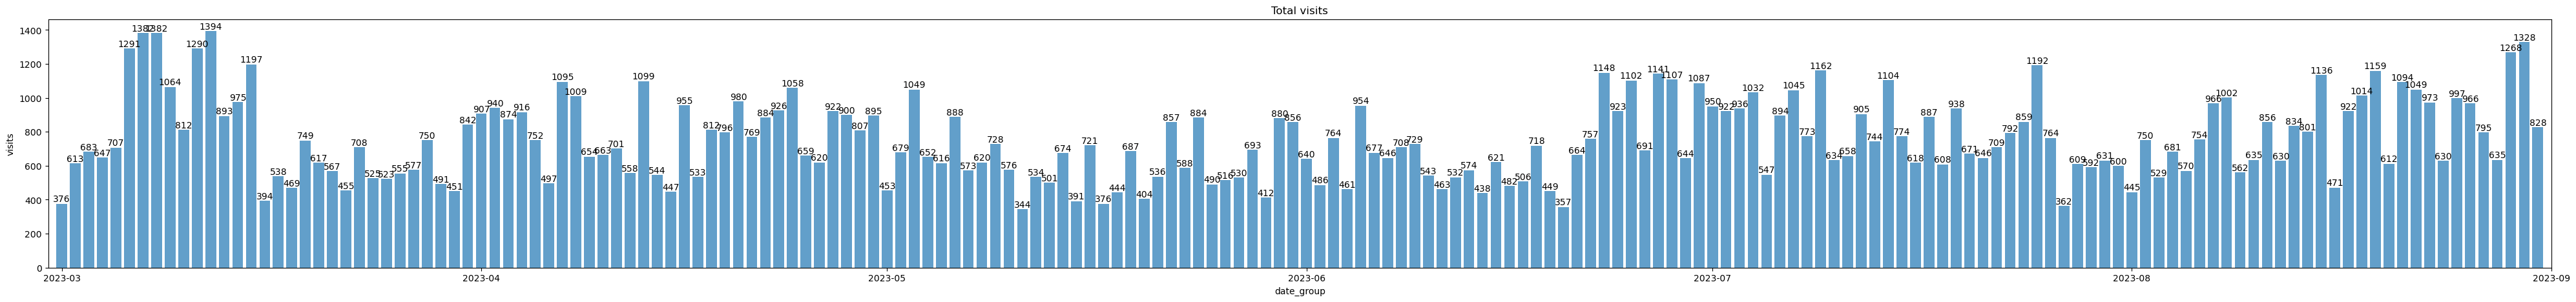

In [162]:
# Установка размера диаграммы
plt.figure(figsize=(50,5))

# Определение осей
x = ads.date_group
y = ads.visits

# Определение вида диаграммы
bars = plt.bar(x, y, alpha=0.7)

# Исключение пустого пространства по оси X
plt.xlim(x.iloc[0] - (x.iloc[1] - x.iloc[0]), x.iloc[-1] + (x.iloc[1] - x.iloc[0]))

# Добавление подписей данных на диаграмму
for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, int(y_val), ha='center', va='bottom')

# Установка заголовка и меток осей
plt.xlabel('date_group')
plt.ylabel('visits')
plt.title('Total visits')

# Сохранение визуализации
plt.savefig('./charts/total_visits.png')

# Отображение графика
plt.show()

Визуализация "Итоговые визиты с разбивкой по платформам"

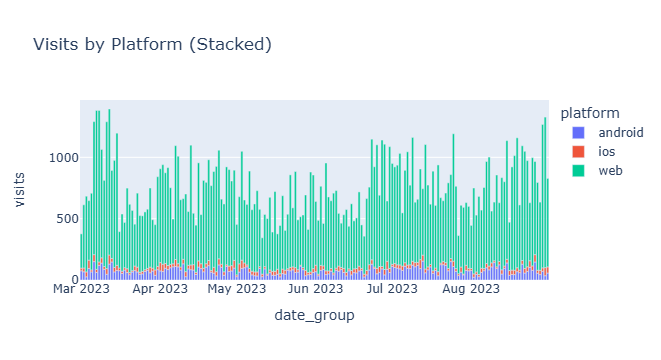

<Figure size 5000x500 with 0 Axes>

In [165]:
# Установка размера диаграммы
plt.figure(figsize=(50,5))

# Определение осей
x = conversion.date_group
y = conversion.visits
z = conversion.platform

# Определение вида диаграммы
fig = px.bar(conversion, x=x, y=y, color=z, title='Visits by Platform (Stacked)')

# Сохранение визуализации
fig.write_image('./charts/visits_by_platform.png')

# Отображение графика
fig.show()

Визуализация "Итоговые регистрации"

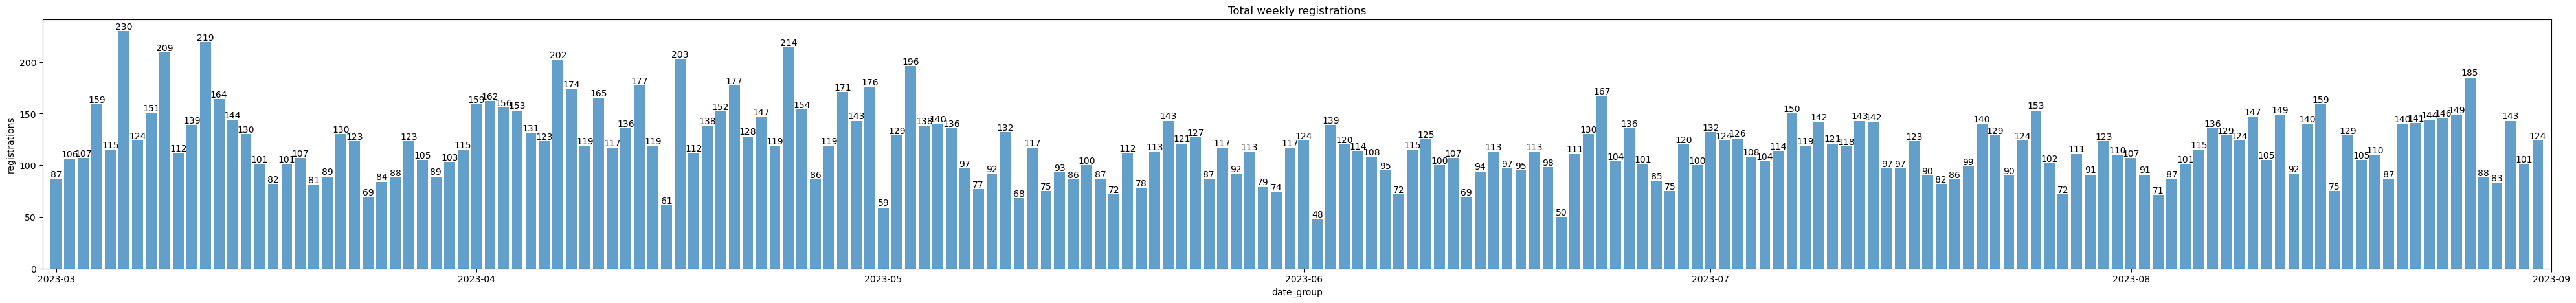

In [168]:
# Установка размера диаграммы
plt.figure(figsize=(50,5))

# Определение осей
x = ads.date_group
y = ads.registrations

# Определение вида диаграммы
bars = plt.bar(x, y, alpha=0.7)

# Исключение пустого пространства по оси X
plt.xlim(x.iloc[0] - (x.iloc[1] - x.iloc[0]), x.iloc[-1] + (x.iloc[1] - x.iloc[0]))

# Добавление подписей данных на диаграмму
for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, int(y_val), ha='center', va='bottom')

# Установка заголовка и меток осей
plt.xlabel('date_group')
plt.ylabel('registrations')
plt.title('Total weekly registrations')

# Сохранение визуализации
plt.savefig('./charts/total_weekly_registrations.png')

# Отображение графика
plt.show()

Визуализация "Итоговые регистрации с разбивкой по платформе"

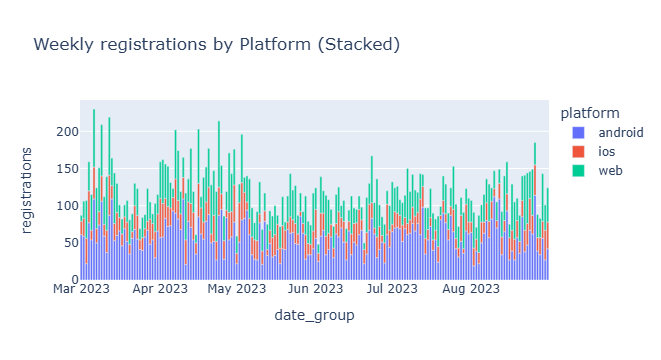

<Figure size 5000x500 with 0 Axes>

In [171]:
# Установка размера диаграммы
plt.figure(figsize=(50,5))

# Определение осей
x = conversion.date_group
y = conversion.registrations
z = conversion.platform

# Определение вида диаграммы
fig = px.bar(conversion, x=x, y=y, color=z, title='Weekly registrations by Platform (Stacked)')

# Сохранение визуализации
fig.write_image('./charts/weekly_registrations_by_platform.png')

# Отображение графика
fig.show()

Визуализация "Итоговые конверсии"

In [174]:
# Добавление колонки с расчётом конверсии в датасет ads
ads['conversion'] = round(ads["registrations"] / ads["visits"] * 100, 0)
ads.head()

date_group  visits  registrations  cost                utm_campaign  \
0 2023-03-01     376             87   212  advanced_algorithms_series   
1 2023-03-02     613            106   252  advanced_algorithms_series   
2 2023-03-03     683            107   202  advanced_algorithms_series   
3 2023-03-04     647            159   223  advanced_algorithms_series   
4 2023-03-05     707            115   265  advanced_algorithms_series   

   conversion  
0        23.0  
1        17.0  
2        16.0  
3        25.0  
4        16.0

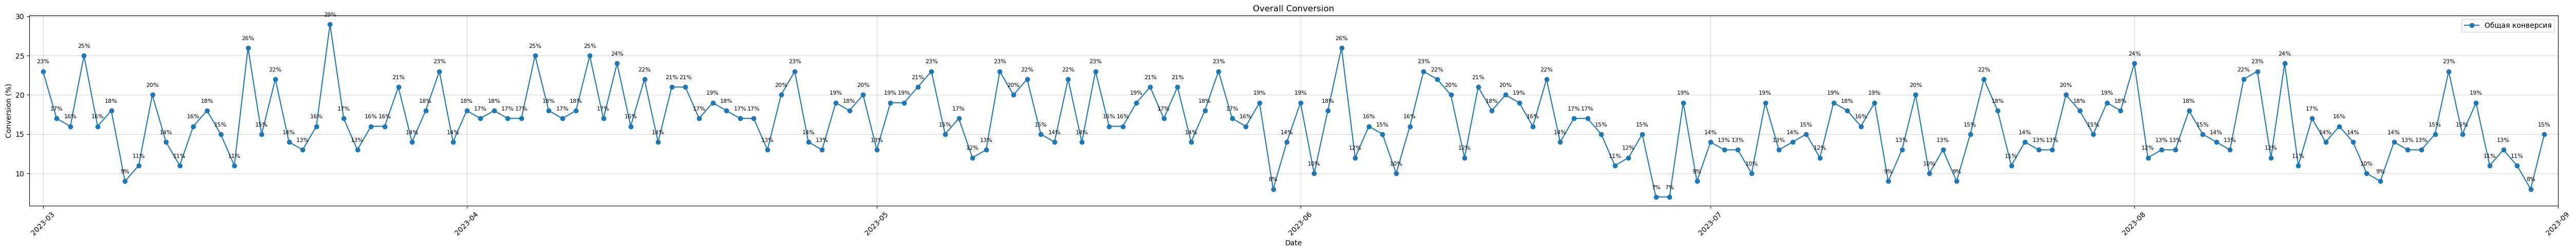

In [176]:
# Построение графика
plt.figure(figsize=(50, 5))
plt.plot(ads["date_group"], ads['conversion'], marker='o', label="Общая конверсия")

# Добавление меток данных
for i, value in enumerate(ads['conversion']):
    plt.text(ads['date_group'][i], value + 1, f"{int(value)}%", ha='center', fontsize=8)

# Настройка графика
plt.title("Overall Conversion")
plt.xlabel("Date")
plt.ylabel("Conversion (%)")
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="-", alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()

# Исключение пустого пространства по оси X
plt.xlim(x.iloc[0] - (x.iloc[5] - x.iloc[0]), x.iloc[-1] + (x.iloc[5] - x.iloc[0]))

# Сохранение визуализации
plt.savefig('./charts/overall_conversion.png')

# Показать график
plt.show()

Визуализация "Конверсия по каждой платформе"

In [179]:
# Создание датасетов, отфильтрованных по платформам
conv_android = conversion[(conversion["platform"] == "android")]
conv_ios = conversion[(conversion["platform"] == "ios")]
conv_web = conversion[(conversion["platform"] == "web")]
#conv_android.head()
#conv_ios.head()
#conv_web.head()

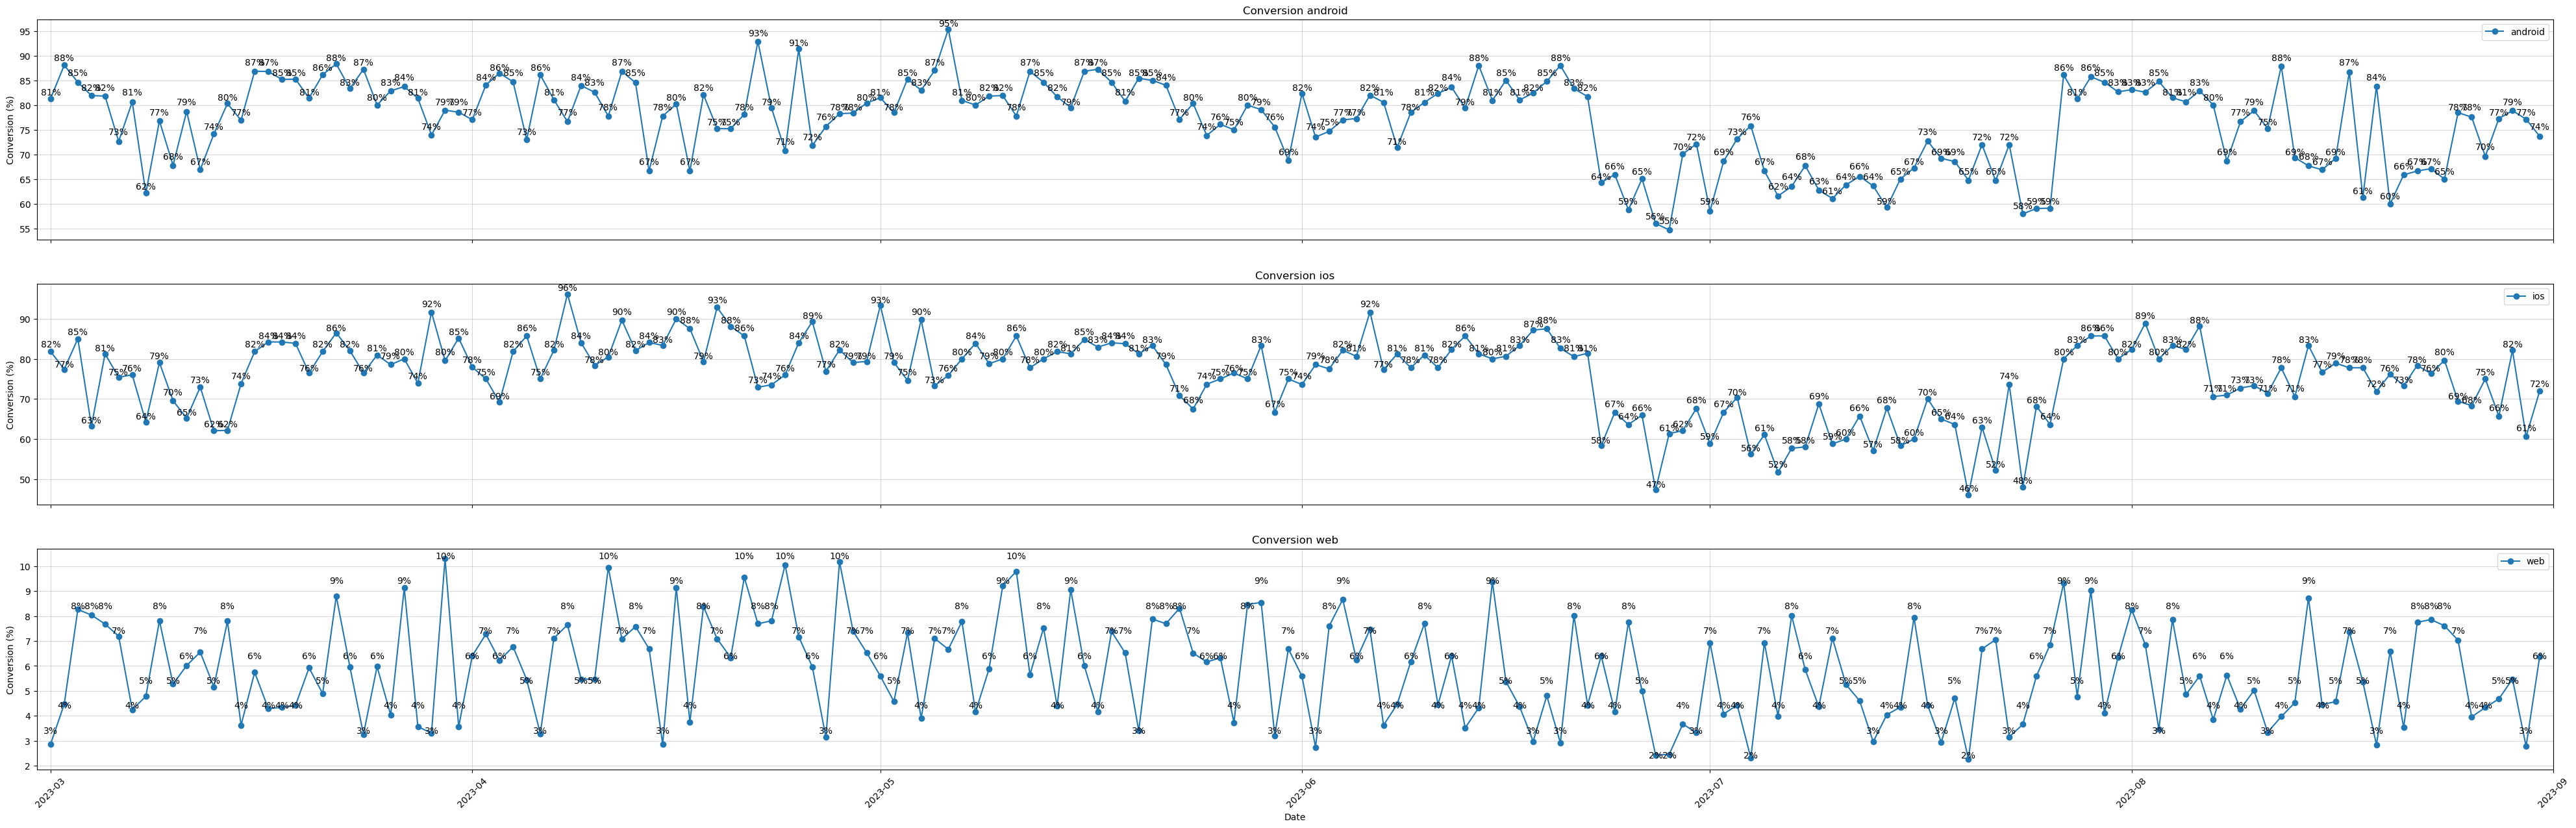

In [181]:
# Создание холста
fig, axes = plt.subplots(3, 1, figsize=(50, 15), sharex=True)

# Настройка графика для android
axes[0].plot(conv_android['date_group'], conv_android['conversion'], marker='o', label='android')
axes[0].set_title("Conversion android")
#axes[0].set_xlabel("Date")
axes[0].set_ylabel("Conversion (%)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle="-", alpha=0.5)
axes[0].legend()

# Настройка графика для ios
axes[1].plot(conv_ios['date_group'], conv_ios['conversion'], marker='o', label='ios')
axes[1].set_title("Conversion ios")
#axes[1].set_xlabel("Date")
axes[1].set_ylabel("Conversion (%)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle="-", alpha=0.5)
axes[1].legend()

# Настройка графика для web
axes[2].plot(conv_web['date_group'], conv_web['conversion'], marker='o', label='web')
axes[2].set_title("Conversion web")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Conversion (%)")
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, linestyle="-", alpha=0.5)
axes[2].legend()

# Добавление меток данных
for i, value in enumerate(conv_android['conversion']):
    axes[0].text(conv_android['date_group'].iloc[i], round(value, 0) + 1, f"{int(round(value, 0))}%", ha='center')

for i, value in enumerate(conv_ios['conversion']):
    axes[1].text(conv_ios['date_group'].iloc[i], round(value, 0) + 1, f"{int(round(value, 0))}%", ha='center')

for i, value in enumerate(conv_web['conversion']):
    axes[2].text(conv_web['date_group'].iloc[i], round(value, 0) + 0.3, f"{int(round(value, 0))}%", ha='center')

# Исключение пустого пространства по оси X
plt.xlim(x.iloc[0] - (x.iloc[5] - x.iloc[0]), x.iloc[-1] + (x.iloc[5] - x.iloc[0]))

# Сохранение визуализации
plt.savefig('./charts/conversion_by_platforms.png')

# Показать график
plt.show()

Визуализация "Стоимость реклам"

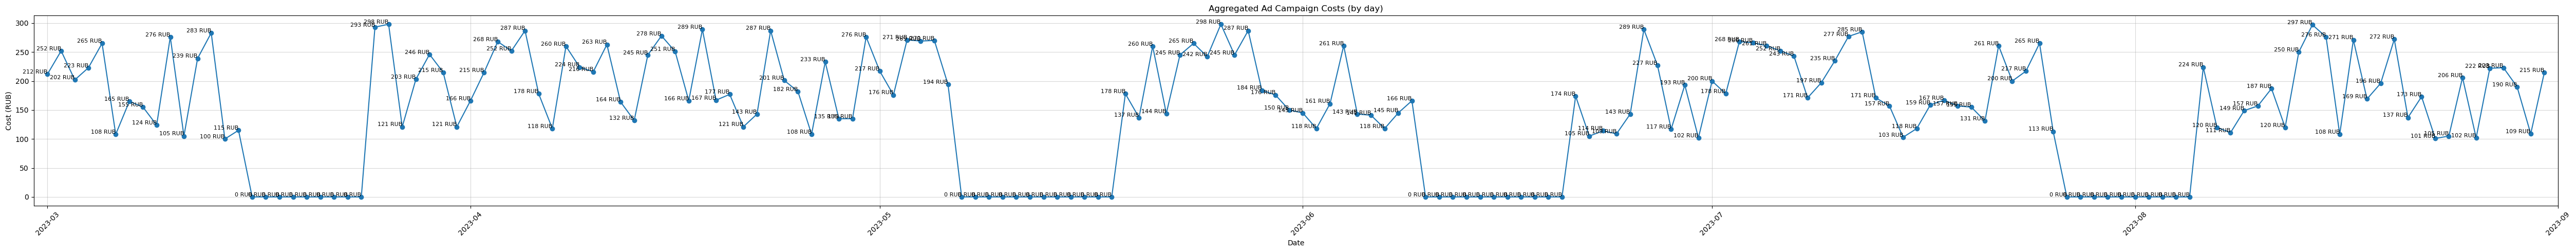

In [184]:
# Построение графика
plt.figure(figsize=(50, 5))
plt.plot(ads["date_group"], ads['cost'], marker='o')

# Добавление меток данных
for i, value in enumerate(ads['cost']):
    plt.text(ads['date_group'][i], value + 1, f"{int(value)} RUB", ha='right', fontsize=8)

# Настройка графика
plt.title("Aggregated Ad Campaign Costs (by day)")
plt.xlabel("Date")
plt.ylabel("Cost (RUB)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="-", alpha=0.5)
plt.tight_layout()

# Исключение пустого пространства по оси X
plt.xlim(x.iloc[0] - (x.iloc[5] - x.iloc[0]), x.iloc[-1] + (x.iloc[5] - x.iloc[0]))

# Сохранение визуализации
plt.savefig('./charts/aggregated_ad_campaign_costs.png')

# Показать график
plt.show()

Визуализация "Визиты и регистрации с выделением рекламных кампаний"

In [187]:
# Создание датасета для определения границ выделенных областей
group_ads = ads.groupby('utm_campaign')['date_group'].agg(['min', 'max'])
group_ads = group_ads.sort_values(by='min')
group_ads = group_ads.query('utm_campaign != "none"').reset_index() # исключение категории "none"
print(group_ads)

                 utm_campaign        min        max
0  advanced_algorithms_series 2023-03-01 2023-03-15
1    virtual_reality_workshop 2023-03-25 2023-05-06
2          ui_ux_design_drive 2023-05-19 2023-06-09
3     women_in_tech_symposium 2023-06-21 2023-07-26
4      intro_to_python_course 2023-08-06 2023-08-31


In [189]:
# Создание словаря для определения границ выделенных областей
colors = ["lightblue", "peachpuff", "lightgreen", "lavender", "khaki", "salmon", "cyan"]
highlight_intervals = [
    {
        "start": row["min"],
        "end": row["max"],
        "label": row["utm_campaign"],
        "color": colors[i],
    }
    for i, row in group_ads.iterrows()
]
print(highlight_intervals)

[{'start': Timestamp('2023-03-01 00:00:00'), 'end': Timestamp('2023-03-15 00:00:00'), 'label': 'advanced_algorithms_series', 'color': 'lightblue'}, {'start': Timestamp('2023-03-25 00:00:00'), 'end': Timestamp('2023-05-06 00:00:00'), 'label': 'virtual_reality_workshop', 'color': 'peachpuff'}, {'start': Timestamp('2023-05-19 00:00:00'), 'end': Timestamp('2023-06-09 00:00:00'), 'label': 'ui_ux_design_drive', 'color': 'lightgreen'}, {'start': Timestamp('2023-06-21 00:00:00'), 'end': Timestamp('2023-07-26 00:00:00'), 'label': 'women_in_tech_symposium', 'color': 'lavender'}, {'start': Timestamp('2023-08-06 00:00:00'), 'end': Timestamp('2023-08-31 00:00:00'), 'label': 'intro_to_python_course', 'color': 'khaki'}]


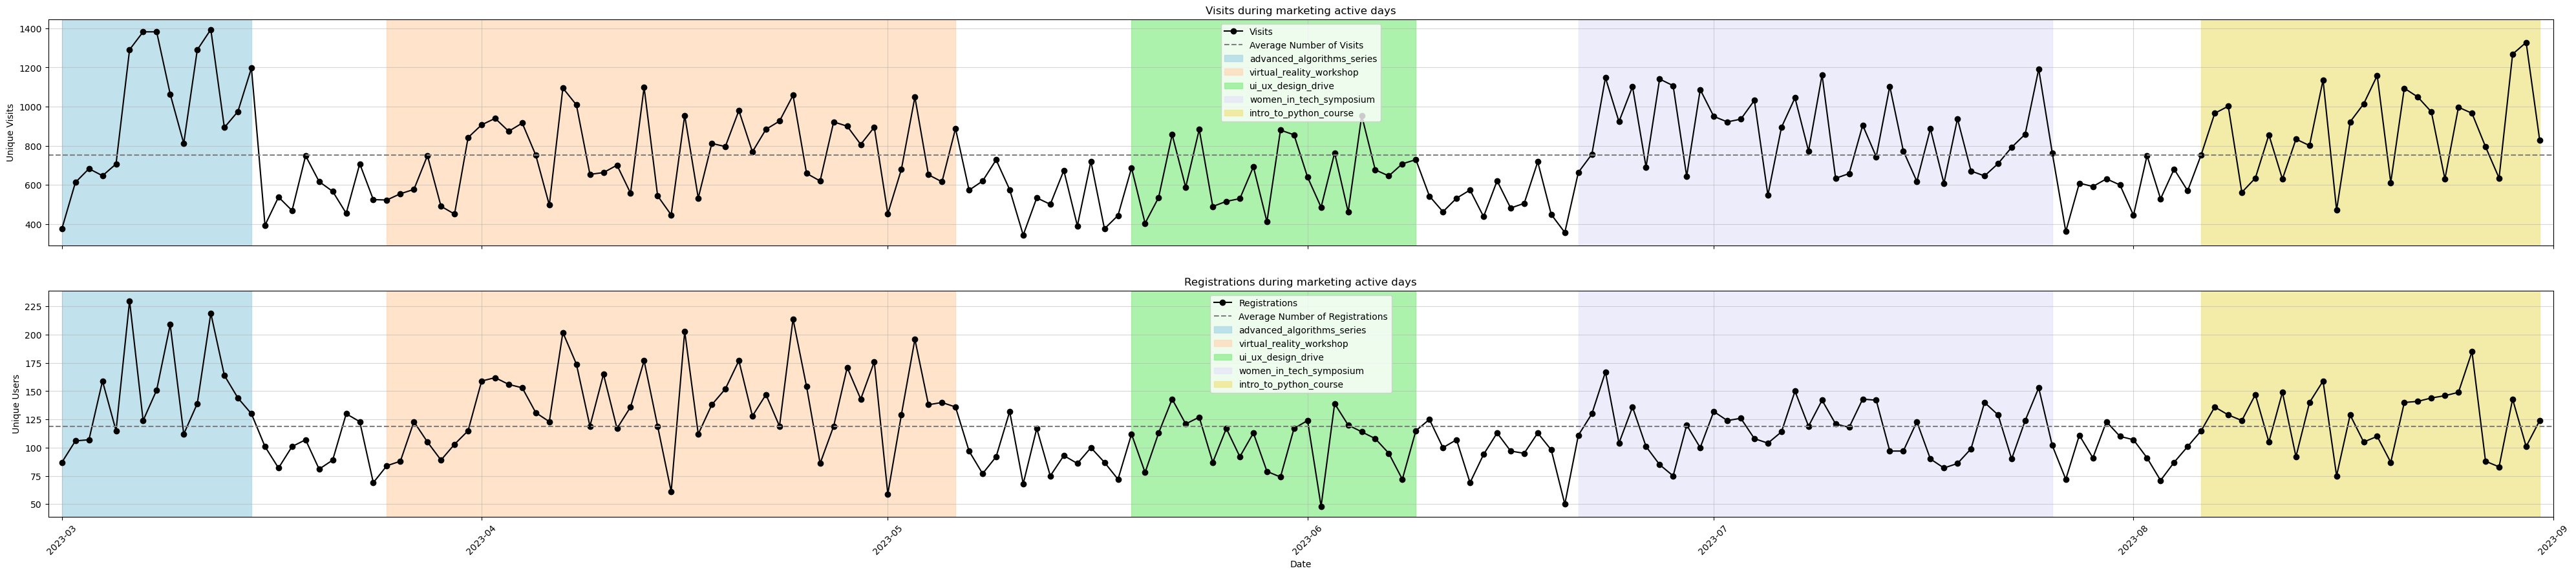

In [191]:
# Создание холста
fig, axes = plt.subplots(2, 1, figsize=(50, 10), sharex=True)

# Настройка графика для visits
axes[0].plot(ads['date_group'], ads["visits"], marker='o', color = 'black', label='Visits')
axes[0].set_title("Visits during marketing active days")
axes[0].set_ylabel("Unique Visits")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle="-", alpha=0.5)
axes[0].legend()

# Настройка графика для registrations
axes[1].plot(ads['date_group'], ads['registrations'], marker='o', color = 'black', label='Registrations')
axes[1].set_title("Registrations during marketing active days")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Unique Users")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle="-", alpha=0.5)
axes[1].legend()

# Добавление средних линий
average_visits = ads['visits'].mean()
axes[0].axhline(y=average_visits, color='gray', linestyle='--', label='Average Number of Visits')
average_registrations = ads['registrations'].mean()
axes[1].axhline(y=average_registrations, color='gray', linestyle='--', label='Average Number of Registrations')

# Добавление выделенных областей
for interval in highlight_intervals:
    axes[0].axvspan(
        pd.to_datetime(interval["start"]),
        pd.to_datetime(interval["end"]),
        color=interval['color'],
        alpha=0.75,
        label=interval["label"]
    )

for interval in highlight_intervals:
    axes[1].axvspan(
        pd.to_datetime(interval["start"]),
        pd.to_datetime(interval["end"]),
        color=interval['color'],
        alpha=0.75,
        label=interval["label"]
    )

# Добавление легенды
label=f"Area: {interval['label']}"

handles_0, labels_0 = axes[0].get_legend_handles_labels()
unique_labels_0 = dict(zip(labels_0, handles_0))
axes[0].legend(unique_labels_0.values(), unique_labels_0.keys(), loc="best")

handles_1, labels_1 = axes[1].get_legend_handles_labels()
unique_labels_1 = dict(zip(labels_1, handles_1))
axes[1].legend(unique_labels_1.values(), unique_labels_1.keys(), loc="best")

# Исключение пустого пространства по оси X
plt.xlim(x.iloc[0] - (x.iloc[5] - x.iloc[0]), x.iloc[-1] + (x.iloc[5] - x.iloc[0]))

# Сохранение визуализации
plt.savefig('./charts/vis_and_reg_during_marketing_active_days.png')

# Показать график
plt.show()